# Bonus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("../data/Индия_2025.xlsx", thousands=",")
df

,Company,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,ANURAS,2025-09-29,1100.50,1093.60,1105.00,1054.80,1059.00,1075.10,1087.08,454511,4.940906e+08,19488
1,ANURAS,2025-09-30,1075.10,1062.10,1084.60,1045.20,1066.10,1071.40,1064.22,345390,3.675724e+08,11967
2,ANURAS,2025-10-01,1071.40,1079.50,1080.80,1056.50,1060.60,1065.30,1071.82,230482,2.470346e+08,8418
3,ANURAS,2025-10-03,1065.30,1072.00,1101.30,1052.70,1082.00,1088.40,1080.11,723328,7.812721e+08,21498
4,ANURAS,2025-10-06,1088.40,1089.80,1093.20,1072.10,1079.20,1079.40,1082.20,242628,2.625731e+08,9325
...,...,...,...,...,...,...,...,...,...,...,...,...
2215,WIPRO,2025-12-19,263.85,267.00,267.00,263.30,264.17,264.45,264.63,12750745,3.374205e+09,65906
2216,WIPRO,2025-12-22,264.45,267.51,273.10,266.80,272.65,272.67,271.28,14651313,3.974562e+09,142390
2217,WIPRO,2025-12-23,272.67,272.00,272.48,270.21,271.30,271.40,271.28,7572420,2.054246e+09,75683
2218,WIPRO,2025-12-24,271.40,270.94,270.98,267.20,268.14,268.06,268.42,4694861,1.260216e+09,62692


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company                2220 non-null   object        
 1   Date                   2220 non-null   datetime64[ns]
 2   Prev Close             2220 non-null   float64       
 3   Open Price             2220 non-null   float64       
 4   High Price             2220 non-null   float64       
 5   Low Price              2220 non-null   float64       
 6   Last Price             2220 non-null   float64       
 7   Close Price            2220 non-null   float64       
 8   Average Price          2220 non-null   float64       
 9   Total Traded Quantity  2220 non-null   int64         
 10  Turnover               2220 non-null   float64       
 11  No. of Trades          2220 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory u

In [3]:
df.Company.unique()

array(['ANURAS', 'APOLLOHOSP', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL',
       'BPCL', 'COALINDIA', 'DRREDDY', 'FORCEMOT', 'GRSE', 'HBLENGINE',
       'HCLTECH', 'HDFCBANK', 'HINDALCO', 'HINDCOPPER', 'ICICIBANK',
       'INDIGO', 'INFY', 'IOC', 'ITC', 'KOTAKBANK', 'LT', 'MARUTI',
       'MUTHOOTFIN', 'NTPC', 'PFC', 'RAJESHEXPO', 'SBIN', 'SUNPHARMA',
       'TCS', 'TECHM', 'TATAMOTORS', 'TMPV', 'VEDL', 'WIPRO'],
      dtype=object)

In [4]:
df["log_return"] = df.groupby("Company")["Close Price"].transform(
    lambda x: np.log(x / x.shift(1))
)

data = df.groupby("Company")["log_return"].agg(
    mean_return="mean",
    std_return="std"
).reset_index()

C:\Users\Artvl\AppData\Local\Temp\ipykernel_3316\77269783.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(data))


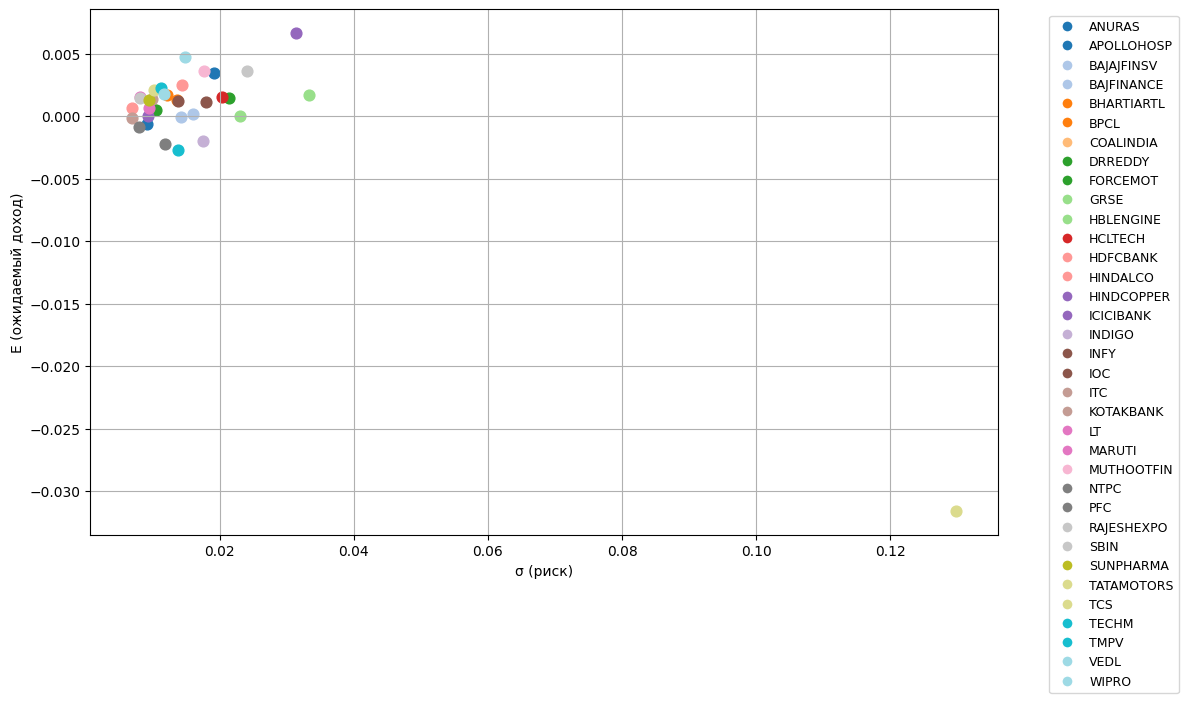

In [5]:
plt.figure(figsize=(12, 7))

# Берём достаточно цветов
cmap = plt.cm.get_cmap("tab20", len(data))

for i, (_, row) in enumerate(data.iterrows()):
    plt.scatter(
        row["std_return"],
        row["mean_return"],
        color=cmap(i),
        s=60
    )

# Легенда отдельно
handles = [
    plt.Line2D(
        [0], [0],
        marker="o",
        color="w",
        label=row["Company"],
        markerfacecolor=cmap(i),
        markersize=8
    )
    for i, (_, row) in enumerate(data.iterrows())
]

plt.legend(
    handles=handles,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=9,
    frameon=True
)

plt.xlabel("σ (риск)")
plt.ylabel("E (ожидаемый доход)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
def find_pareto_frontier(df):
    # Сортировка по возрастанию риска
    sorted_df = df.sort_values('std_return')
    
    pareto = []
    max_return = 0  # Начальный максимум дохода
    
    for _, row in sorted_df.iterrows():
        if row['mean_return'] > max_return:
            pareto.append(row)
            max_return = row['mean_return']
    
    return pd.DataFrame(pareto)

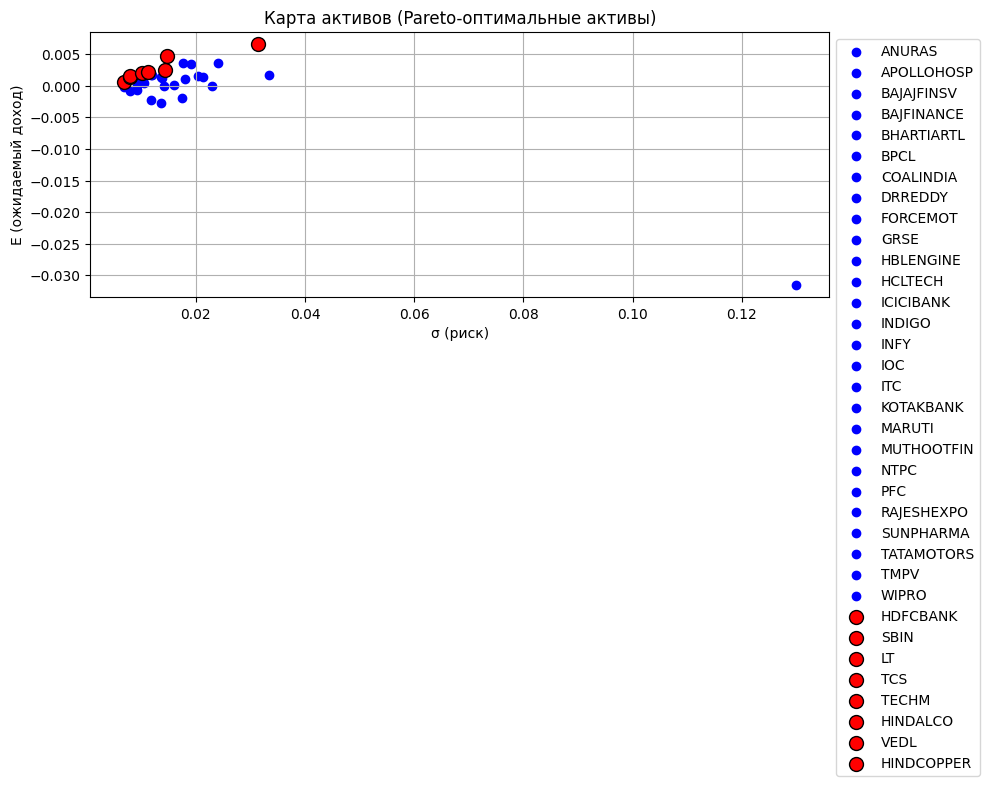

In [7]:
# Вычисление Pareto-фронта
pareto_df = find_pareto_frontier(data)

plt.figure(figsize=(10, 6))

# Все активы (синие точки с метками компаний)
for _, row in data.iterrows():
    if row["Company"] not in pareto_df["Company"].unique():
        plt.scatter(row["std_return"], row["mean_return"], color='blue', label=row["Company"])

# Pareto-оптимальные активы (красные точки)
for _, row in pareto_df.iterrows():
    plt.scatter(row["std_return"], row["mean_return"], color='red', s=100, edgecolor='black', zorder=3, label=row["Company"])  # Большие точки для выделения


plt.title("Карта активов (Pareto-оптимальные активы)")
plt.xlabel("σ (риск)")
plt.ylabel("E (ожидаемый доход)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
pareto_df

,Company,mean_return,std_return
12,HDFCBANK,0.000673,0.006887
27,SBIN,0.001446,0.008024
21,LT,0.001498,0.008036
30,TCS,0.002075,0.010229
31,TECHM,0.002226,0.011174
13,HINDALCO,0.002445,0.014358
33,VEDL,0.004738,0.014815
14,HINDCOPPER,0.006632,0.031432


на основе анализа лог-доходности индийских активов из NIFTY 50 был составлен парето-оптимальный портфель. Доля каждого актива в пределах 10-15%. Такой подход обеспечивает диверсифицированность портфеля по секторам,
| Актив      |     Доля | mean_return | std_return | Сектор              |
| ---------- | -------: | ----------: | ---------: | ------------------- |
| HDFCBANK   |      15% |     0.00067 |     0.0069 | Банк                |
| SBIN       |      15% |     0.00145 |     0.0080 | Банк                |
| LT         |      10% |     0.00150 |     0.0080 | Инфраструктура      |
| TCS        |      10% |     0.00208 |     0.0102 | IT                  |
| TECHM      |      10% |     0.00223 |     0.0112 | IT                  |
| HINDALCO   |      10% |     0.00245 |     0.0144 | Металлы             |
| VEDL       |      15% |     0.00474 |     0.0148 | Металлы             |
| HINDCOPPER |      15% |     0.00663 |     0.0314 | Металлы (high beta) |

In [9]:
portfolio = {
    "HDFCBANK": 0.15,
    "SBIN": 0.15,
    "LT": 0.10,
    "TCS": 0.10,
    "TECHM": 0.10,
    "HINDALCO": 0.10,
    "VEDL": 0.15,
    "HINDCOPPER": 0.15
}

df_port = df[df["Company"].isin(portfolio.keys())].copy()

weights = np.array([portfolio[comp] for comp in df_port["Company"].unique()])
weights

array([0.15, 0.1 , 0.15, 0.1 , 0.15, 0.1 , 0.1 , 0.15])

## 2026 год

In [10]:
df = pd.read_excel("../data/Индия_2026.xlsx", thousands=",")
df

,Company,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HDFCBANK,2026-01-01,991.20,993.50,997.55,989.50,991.15,991.15,991.88,7132074,7.074148e+09,126886,2485813,34.85
1,HDFCBANK,2026-01-02,991.15,991.15,1003.20,988.80,1000.25,1001.60,998.46,11751459,1.173333e+10,178613,7814202,66.50
2,HDFCBANK,2026-01-05,1001.60,1005.75,1006.40,976.30,978.50,977.50,984.33,27647379,2.721412e+10,382990,20956352,75.80
3,HDFCBANK,2026-01-06,977.50,962.70,966.70,956.00,962.95,962.20,962.45,31988783,3.078757e+10,459604,22650555,70.81
4,HDFCBANK,2026-01-07,962.20,956.00,956.45,946.00,950.25,949.05,950.10,52884712,5.024574e+10,414168,43998886,83.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,VEDL,2026-01-23,678.65,685.00,699.00,681.45,685.15,684.15,690.75,21435331,1.480651e+10,190461,8239900,38.44
156,VEDL,2026-01-27,684.15,697.10,707.35,694.55,706.95,705.45,701.19,18667388,1.308945e+10,209784,8336029,44.66
157,VEDL,2026-01-28,705.45,711.10,741.95,710.10,736.50,737.10,730.74,26645434,1.947081e+10,271346,7125201,26.74
158,VEDL,2026-01-29,737.10,745.25,769.80,743.00,767.55,766.35,756.42,30290476,2.291239e+10,290510,10843598,35.80


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Company                 160 non-null    object        
 1   Date                    160 non-null    datetime64[ns]
 2   Prev Close              160 non-null    float64       
 3   Open Price              160 non-null    float64       
 4   High Price              160 non-null    float64       
 5   Low Price               160 non-null    float64       
 6   Last Price              160 non-null    float64       
 7   Close Price             160 non-null    float64       
 8   Average Price           160 non-null    float64       
 9   Total Traded Quantity   160 non-null    int64         
 10  Turnover                160 non-null    float64       
 11  No. of Trades           160 non-null    int64         
 12  Deliverable Qty         160 non-null    int64     

### Цена на 20 день торгов

In [12]:
last_day_data = df[df["Date"] == "2026-01-30"]
last_day_data

,Company,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
19,HDFCBANK,2026-01-30,935.50,930.0,938.9,927.75,929.00,929.25,931.84,29691233,2.766737e+10,251637,21792184,73.40
39,HINDALCO,2026-01-30,1024.05,1000.0,1000.0,955.55,962.80,962.60,968.53,11977092,1.160022e+10,190659,5827397,48.65
59,HINDCOPPER,2026-01-30,760.05,726.0,736.5,671.25,675.95,685.90,699.40,113198070,7.917033e+10,1519271,24225035,21.40
79,LT,2026-01-30,3932.90,3902.5,3942.4,3891.80,3935.00,3932.30,3923.36,2208465,8.664602e+09,120197,1579119,71.50
99,SBIN,2026-01-30,1066.20,1064.0,1082.5,1060.40,1077.00,1077.15,1074.86,9480769,1.019048e+10,167283,5649219,59.59
119,TCS,2026-01-30,3144.40,3141.0,3141.0,3092.00,3129.00,3123.90,3121.64,3022068,9.433821e+09,80949,2101964,69.55
139,TECHM,2026-01-30,1768.40,1757.1,1760.0,1731.00,1735.20,1743.10,1742.35,1672787,2.914582e+09,76348,1086437,64.95
159,VEDL,2026-01-30,766.35,755.0,755.0,675.10,680.00,681.55,705.38,54628339,3.853382e+10,518423,20656300,37.81


In [13]:
df_prices = pd.DataFrame({
    "Ticker": [
        "HDFCBANK", "HINDALCO", "HINDCOPPER", "LT",
        "SBIN", "TCS", "TECHM", "VEDL"
    ],
    "Close_2025": [
        991.20, 886.70, 518.30, 4083.50,
        982.20, 3206.20, 1590.90, 604.40
    ],
    "Close_20d_2026": [
        929.25, 962.60, 685.90, 3932.30,
        1077.15, 3123.90, 1735.20, 681.55
    ]
})

df_prices

,Ticker,Close_2025,Close_20d_2026
0,HDFCBANK,991.2,929.25
1,HINDALCO,886.7,962.60
2,HINDCOPPER,518.3,685.90
3,LT,4083.5,3932.30
4,SBIN,982.2,1077.15
5,TCS,3206.2,3123.90
6,TECHM,1590.9,1735.20
7,VEDL,604.4,681.55


### Лог-доходность

In [14]:
df_prices["Log_return_20d"] = np.log(
    df_prices["Close_20d_2026"] / df_prices["Close_2025"]
)

df_prices

,Ticker,Close_2025,Close_20d_2026,Log_return_20d
0,HDFCBANK,991.2,929.25,-0.064539
1,HINDALCO,886.7,962.60,0.082131
2,HINDCOPPER,518.3,685.90,0.280178
3,LT,4083.5,3932.30,-0.037730
4,SBIN,982.2,1077.15,0.092279
5,TCS,3206.2,3123.90,-0.026004
6,TECHM,1590.9,1735.20,0.086823
7,VEDL,604.4,681.55,0.120133


In [15]:
log_returns = df_prices.set_index("Ticker")["Log_return_20d"]
real_portfolio_return = (log_returns * weights).sum()
print("Реальная лог-доходность портфеля за 20 дней:", real_portfolio_return)

Реальная лог-доходность портфеля за 20 дней: 0.07472970658554123


In [16]:
initial_capital = 100_000
final_value = initial_capital * np.exp(real_portfolio_return)
profit = final_value - initial_capital

final_value, profit
print("Финальная стоимость портфеля:", final_value)
print("Прибыль за 20 дней:", profit)

Финальная стоимость портфеля: 107759.28452678665
Прибыль за 20 дней: 7759.2845267866505


### Риск и ожидаемая доходность

In [17]:
weights = {
    "HDFCBANK": 0.15,
    "SBIN": 0.15,
    "LT": 0.10,
    "TCS": 0.10,
    "TECHM": 0.10,
    "HINDALCO": 0.10,
    "VEDL": 0.15,
    "HINDCOPPER": 0.15,
}


assets = list(weights.keys())

# Вычисление дневных лог-доходностей
df["log_return"] = df.groupby("Company")["Close Price"].transform(
    lambda x: np.log(x / x.shift(1))
)

df_use = df[df["Company"].isin(assets)].copy()
df_use = df_use.sort_values(["Date", "Company"])

# матрица дневных лог-доходностей
R = df_use.pivot(index="Date", columns="Company", values="log_return")
R = R[assets].dropna(how="any")

In [18]:
w = pd.Series(weights).reindex(R.columns)

mu_daily = R.mean()                       # средняя дневная лог-доходность каждого актива
expected_return_20d = 20 * float((w * mu_daily).sum())

In [19]:
Sigma_daily = R.cov()                     # ковариация дневных лог-доходностей

daily_var = float(w.T @ Sigma_daily @ w)  # w' Σ w
daily_std = np.sqrt(daily_var)

expected_risk_20d = daily_std * np.sqrt(20)

In [20]:
print("Ожидаемая лог-доходность портфеля за 20 дней:", expected_return_20d)
print("Ожидаемый риск (std) портфеля за 20 дней:", expected_risk_20d)

Ожидаемая лог-доходность портфеля за 20 дней: 0.07364678643235616
Ожидаемый риск (std) портфеля за 20 дней: 0.08362390575238383


### Дневная доходность и стандартное отклонение

In [ ]:
df["log_return"] = df.groupby("Company")["Close Price"].transform(
    lambda x: np.log(x / x.shift(1))
)

Дневная лог-доходность

In [22]:
returns = (
    df[df["Company"].isin(assets)]
    .pivot(index="Date", columns="Company", values="log_return")
    .dropna()
)

w = pd.Series(weights)

portfolio_returns = returns @ w

# Вычисляем среднюю дневную лог-доходность портфеля
mean_daily_portfolio_return = portfolio_returns.mean()
mean_daily_portfolio_return

np.float64(0.0036823393216178077)

Стандартное отклонение дневной доходности портфеля

In [23]:
std_daily_portfolio_return = portfolio_returns.std()
std_daily_portfolio_return

np.float64(0.018698873780636595)

График дневных доходностей портфеля

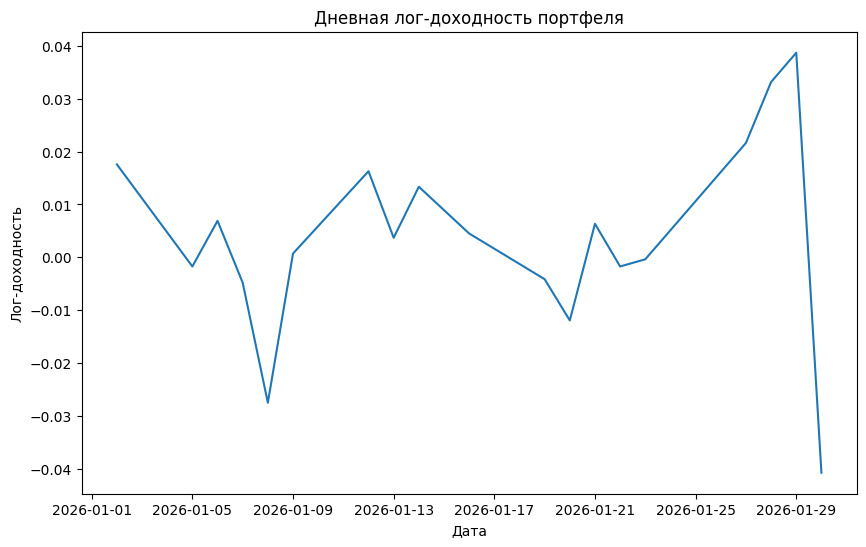

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns)
plt.title("Дневная лог-доходность портфеля")
plt.xlabel("Дата")
plt.ylabel("Лог-доходность")
plt.show()